In [27]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [34]:
col_names = [ 'duration'
, 'protocol_type' 
, 'service'
, 'flag'
, 'src_bytes' 
, 'dst_bytes' 
, 'land' 
, 'wrong_fragment' 
, 'urgent' 
, 'hot' 
, 'num_failed_logins' 
, 'logged_in' 
, 'num_compromised' 
, 'root_shell' 
, 'su_attempted' 
, 'num_root' 
, 'num_file_creations' 
, 'num_shells' 
, 'num_access_files' 
, 'num_outbound_cmds' 
, 'is_host_login'  
, 'is_guest_login' 
, 'count' 
, 'srv_count' 
, 'serror_rate' 
, 'srv_serror_rate' 
, 'rerror_rate' 
, 'srv_rerror_rate' 
, 'same_srv_rate' 
, 'diff_srv_rate' 
, 'srv_diff_host_rate' 
, 'dst_host_count' 
, 'dst_host_srv_count' 
, 'dst_host_same_srv_rate' 
, 'dst_host_diff_srv_rate' 
, 'dst_host_same_src_port_rate' 
, 'dst_host_srv_diff_host_rate' 
, 'dst_host_serror_rate' 
, 'dst_host_srv_serror_rate' 
, 'dst_host_rerror_rate' 
, 'dst_host_srv_rerror_rate' 
, 'class'
, 'diffic' ]

In [35]:
df_train = pd.read_csv('KDDTrain+.txt', sep=",", header=None, names= col_names)
df_test = pd.read_csv('KDDTest+.txt', sep=",", header=None, names= col_names)
print(df_train.shape)
print(df_test.shape)

(125973, 43)
(22544, 43)


In [36]:
df_train['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [37]:
class_dict= {'normal': 'normal',
                        
                        'back': 'DoS',
                        'land': 'DoS',
                        'neptune': 'DoS',
                        'pod': 'DoS',
                        'smurf': 'DoS',
                        'teardrop': 'DoS',
                        'mailbomb': 'DoS',
                        'apache2': 'DoS',
                        'processtable': 'DoS',
                        'udpstorm': 'DoS',
                        
                        'ipsweep': 'Probe',
                        'nmap': 'Probe',
                        'portsweep': 'Probe',
                        'satan': 'Probe',
                        'mscan': 'Probe',
                        'saint': 'Probe',
                    
                        'ftp_write': 'R2L',
                        'guess_passwd': 'R2L',
                        'imap': 'R2L',
                        'multihop': 'R2L',
                        'phf': 'R2L',
                        'spy': 'R2L',
                        'warezclient': 'R2L',
                        'warezmaster': 'R2L',
                        'sendmail': 'R2L',
                        'named': 'R2L',
                        'snmpgetattack': 'R2L',
                        'snmpguess': 'R2L',
                        'xlock': 'R2L',
                        'xsnoop': 'R2L',
                        'worm': 'R2L',
                        
                        'buffer_overflow': 'U2R',
                        'loadmodule': 'U2R',
                        'perl': 'U2R',
                        'rootkit': 'U2R',
                        'httptunnel': 'U2R',
                        'ps': 'U2R',    
                        'sqlattack': 'U2R',
                        'xterm': 'U2R'}

In [38]:
df_train['class'] = df_train['class'].apply(class_dict.get)

In [39]:
df_test['class'] = df_test['class'].apply(class_dict.get)

In [40]:
df_test['class'].unique()

array(['DoS', 'normal', 'Probe', 'R2L', 'U2R'], dtype=object)

In [41]:
df_train['class'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [42]:
df_train['class'].value_counts()

normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: class, dtype: int64

In [44]:
df_test['class'].value_counts()

normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: class, dtype: int64

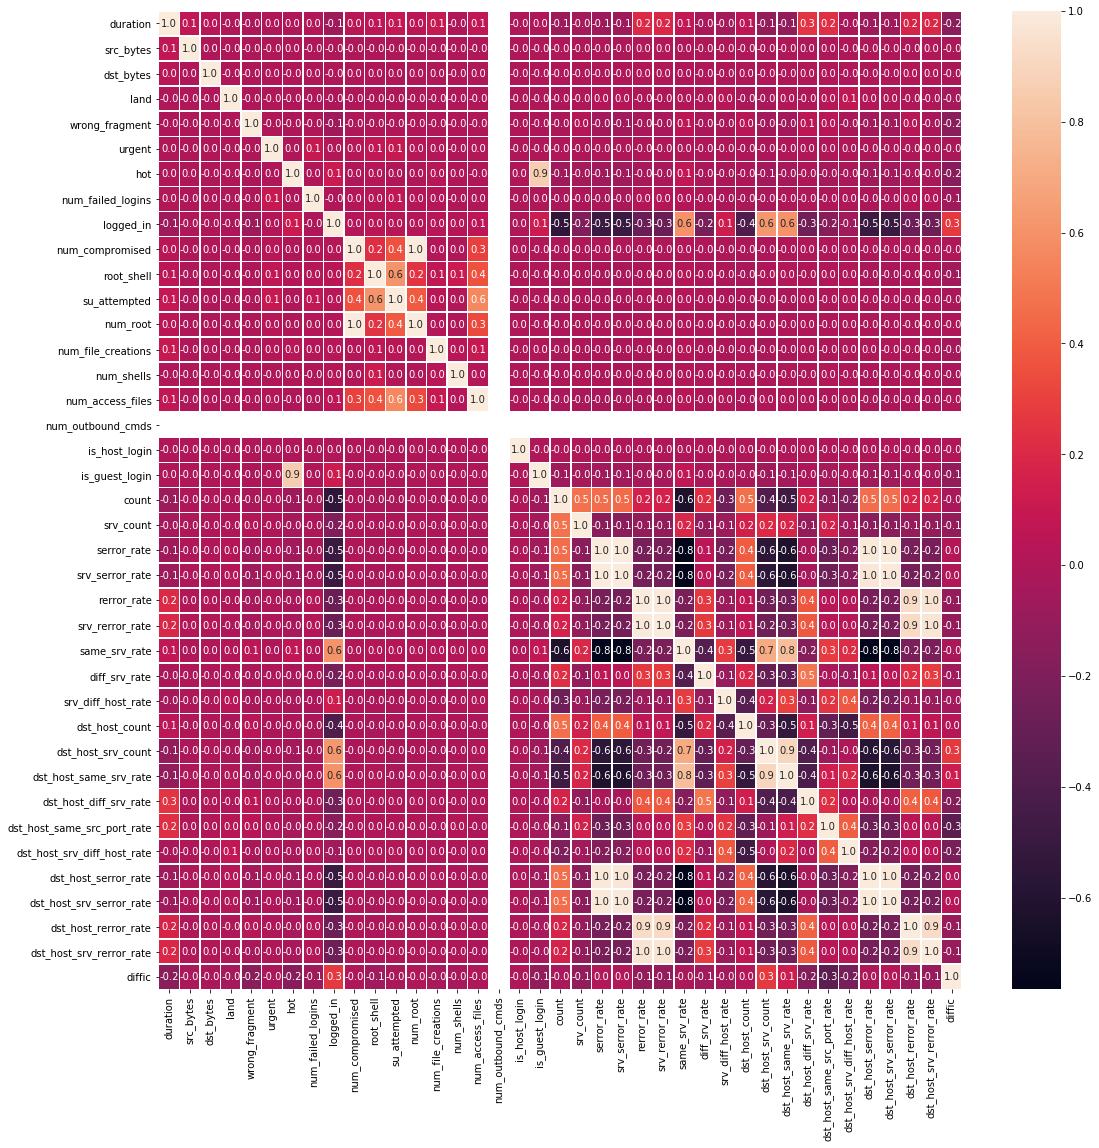

In [46]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [51]:
binary_dict = {'normal': 'normal',
                'DoS': 'attack',
                'R2L': 'attack',
                'Probe': 'attack',
                'U2R': 'attack'}

df_train_bi = df_train.copy()
df_test_bi = df_test.copy()

df_train_bi['class'] = df_train_bi['class'].apply(binary_dict.get)
df_test_bi['class'] = df_test_bi['class'].apply(binary_dict.get)


print('Train data class: ',df_train_bi['class'].unique())
print('Train data class: ',df_test_bi['class'].unique())

print('Train data dim: ',df_train_bi.shape)
print('Test data dim: ',df_test_bi.shape)


Train data class:  ['normal' 'attack']
Train data class:  ['attack' 'normal']
Train data dim:  (125973, 43)
Test data dim:  (22544, 43)


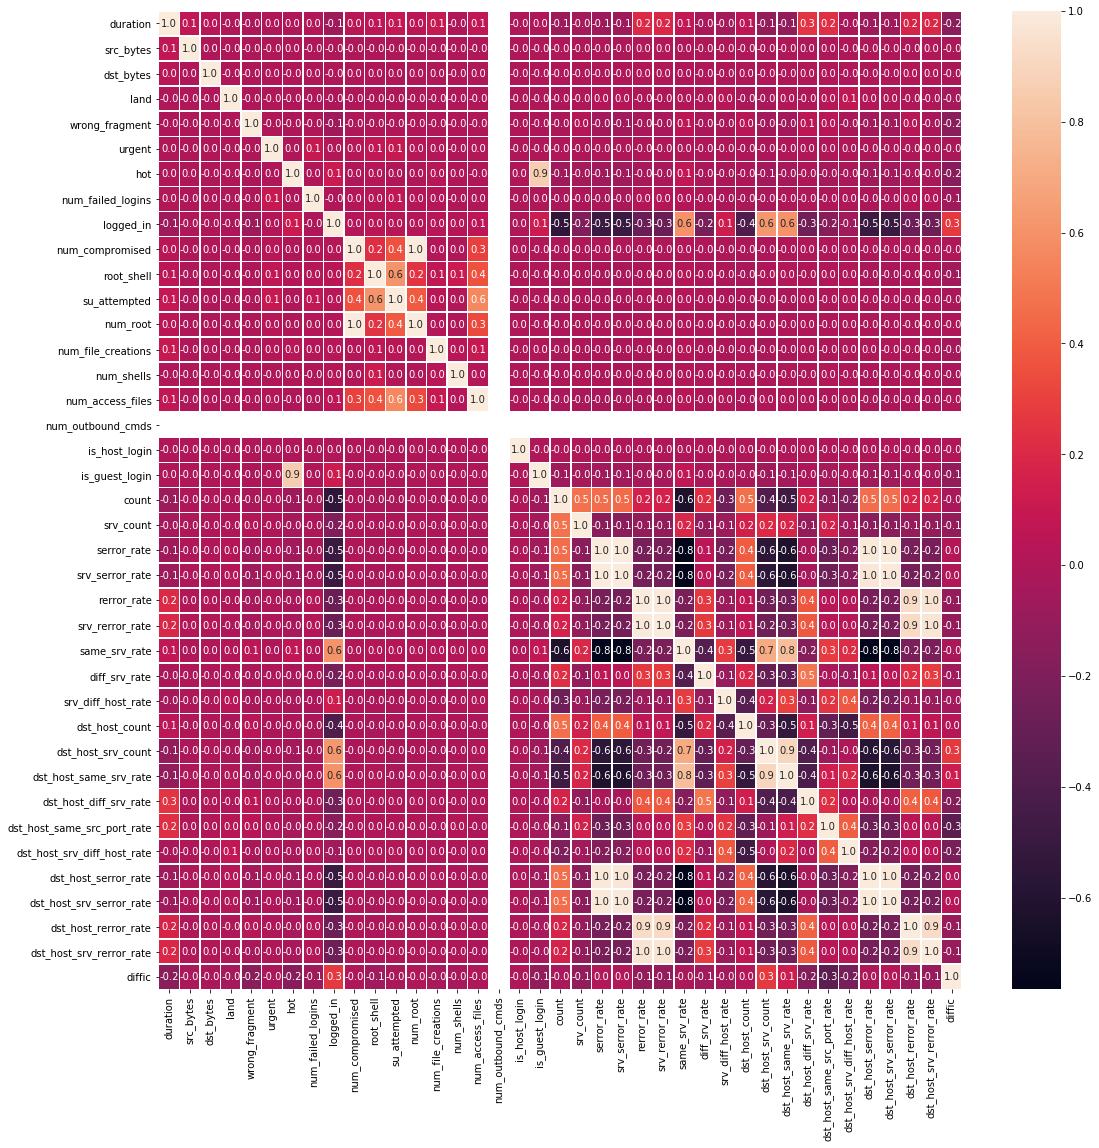

In [53]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_train_bi.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [167]:
corr_matrix = df_train_bi.corr().abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(len(high_corr_var))
print(high_corr_var)

13
[('num_compromised', 'num_root'), ('serror_rate', 'srv_serror_rate'), ('serror_rate', 'dst_host_serror_rate'), ('serror_rate', 'dst_host_srv_serror_rate'), ('srv_serror_rate', 'dst_host_serror_rate'), ('srv_serror_rate', 'dst_host_srv_serror_rate'), ('rerror_rate', 'srv_rerror_rate'), ('rerror_rate', 'dst_host_rerror_rate'), ('rerror_rate', 'dst_host_srv_rerror_rate'), ('srv_rerror_rate', 'dst_host_rerror_rate'), ('srv_rerror_rate', 'dst_host_srv_rerror_rate'), ('dst_host_serror_rate', 'dst_host_srv_serror_rate'), ('dst_host_rerror_rate', 'dst_host_srv_rerror_rate')]


In [57]:
pd.pandas.set_option('display.max_columns', None)
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,diffic
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [106]:
train_cat_vars = [var for var in df_train.columns if df_train[var].dtypes == 'O']

print('Number of categorical variables in Train data: ', len(train_cat_vars))
df_train_cat_vars = ['protocol_type', 'service', 'flag']
# visualise the numerical variables
df_train[df_train_cat_vars].head()

Number of categorical variables in Train data:  4


,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [107]:
test_cat_vars = [var for var in df_test.columns if df_test[var].dtypes == 'O']

print('Number of categorical variables in Test data: ', len(test_cat_vars))
df_test_cat_vars = ['protocol_type', 'service', 'flag']
# visualise the numerical variables

df_test[df_test_cat_vars].head()

Number of categorical variables in Test data:  4


,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [108]:
df_train['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [109]:
df_train['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
aol              2
harvest          2
http_8001        2
http_2784        1
Name: service, Length: 70, dtype: int64

In [110]:
df_train['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [111]:
print(df_test.service.unique())
print(df_test['service'].value_counts())

['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64


In [112]:
unique_protocol=sorted(df_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df_train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df_train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print('Training dataset Dummy Columns:  ', len(dumcols))
print()
print(dumcols)
print()
print()

#do same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
print('Testing dataset Dummy Columns:  ', len(testdumcols))
print()
print(testdumcols)
print()
print()

Training dataset Dummy Columns:   84

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'servi

In [113]:
##Label encoding for transforming categorical variables into numbers
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

df_train_categorical_values= df_train[df_train_cat_vars]
df_test_categorical_values = df_test[df_test_cat_vars]

df_train_categorical_values_enc=df_train_categorical_values.apply(LabelEncoder().fit_transform)
print(df_train_categorical_values_enc.head())
# test set
df_test_categorical_values_enc=df_test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [115]:
print(df_train_categorical_values_enc['protocol_type'].value_counts())
print(df_train_categorical_values_enc['service'].value_counts())
print(df_train_categorical_values_enc['flag'].value_counts())
# print(df_train_categorical_values_enc['class'].value_counts())

1    102689
2     14993
0      8291
Name: protocol_type, dtype: int64
24    40338
49    21853
12     9043
54     7313
20     6860
      ...  
61        3
22        2
27        2
3         2
25        1
Name: service, Length: 70, dtype: int64
9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: flag, dtype: int64


In [118]:
enc = OneHotEncoder()
df_train_categorical_values_encenc = enc.fit_transform(df_train_categorical_values_enc)
df_train_cat_data = pd.DataFrame(df_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
df_test_categorical_values_encenc = enc.fit_transform(df_test_categorical_values_enc)
df_test_cat_data = pd.DataFrame(df_test_categorical_values_encenc.toarray(),columns=testdumcols)


print(df_train_cat_data.shape)
df_train_cat_data.head()

(125973, 84)


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [120]:
### Replacing 6 missing Service Values in Test DF
trainservice=df_train['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_harvest',
 'service_aol',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i']

In [121]:
###Adding 6 missing Service Values in Test DF
for col in difference:
    df_test_cat_data[col] = 0

df_test_cat_data.shape

(22544, 84)

In [5]:
# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False
# selected_columns = data.columns[columns]
# data = data[selected_columns]

23
38
(22544, 43)
(125973, 43)


In [144]:
C_df_train=df_train.join(df_train_cat_data)
C_df_train.drop('flag', axis=1, inplace=True)
C_df_train.drop('protocol_type', axis=1, inplace=True)
C_df_train.drop('service', axis=1, inplace=True)
# test data
C_df_test=df_test.join(df_test_cat_data)
C_df_test.drop('flag', axis=1, inplace=True)
C_df_test.drop('protocol_type', axis=1, inplace=True)
C_df_test.drop('service', axis=1, inplace=True)
print(C_df_train.shape)
print(C_df_test.shape)

(125973, 124)
(22544, 124)


In [145]:
C_df_train['class'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [146]:
binary_dict_1_0 = {'normal': 0,
                'DoS': 1,
                'R2L': 1,
                'Probe': 1,
                'U2R': 1}

In [147]:
F_df_train = C_df_train.copy()
F_df_test = C_df_test.copy()

In [148]:
F_df_train['class'] = F_df_train['class'].apply(binary_dict_1_0.get)
F_df_test['class'] = F_df_test['class'].apply(binary_dict_1_0.get)


print('Train data class: ',F_df_train['class'].unique())
print('Train data class: ',F_df_test['class'].unique())

print('Train data dim: ',F_df_train.shape)
print('Test data dim: ',F_df_test.shape)

Train data class:  [0 1]
Train data class:  [1 0]
Train data dim:  (125973, 124)
Test data dim:  (22544, 124)


In [160]:
X_train = F_df_train.drop('class',1)
y_train = F_df_train['class']
X_test = F_df_test.drop('class',1)
y_test = F_df_test['class']

print('X_Train data dim: ',X_train.shape)
print('X_Test data dim: ',X_test.shape)
print('X_Train data target dim: ',y_train.shape)
print('X_Test data target dim: ',y_test.shape)

X_Train data dim:  (125973, 123)
X_Test data dim:  (22544, 123)
X_Train data target dim:  (125973,)
X_Test data target dim:  (22544,)


In [162]:
colNames_train=list(X_train.columns)
colNames_test=list(X_test)

In [163]:
print(len(colNames_train))
print(len(colNames_test))

123
123


In [150]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,diffic,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [151]:
X_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,diffic,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_harvest,service_aol,service_http_2784,service_http_8001,service_red_i,service_urh_i
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [154]:
from sklearn import preprocessing

scaler_train = preprocessing.StandardScaler().fit(X_train)
X_train=scaler_train.transform(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test=scaler_test.transform(X_test)

print(X_train.std(axis=0))
print(X_test.std(axis=0))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0.]


In [155]:

#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newTrain = selector.fit_transform(X_train,y_train)
X_newTrain.shape

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16] are constant.
  UserWarning)


(125973, 13)

In [166]:
true=selector.get_support()
newcolindex_X_train=[i for i, x in enumerate(true) if x]
newcolname_X_train=list( colNames_train[i] for i in newcolindex_X_train )
newcolname_X_train

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']

In [169]:
### Feature Ranking

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newTrain, y_train)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_X_train)))

DoS Features sorted by their rank:
[(1, 'flag_SF'), (2, 'dst_host_same_srv_rate'), (3, 'count'), (4, 'logged_in'), (5, 'dst_host_srv_count'), (6, 'service_private'), (7, 'dst_host_serror_rate'), (8, 'dst_host_srv_serror_rate'), (9, 'same_srv_rate'), (10, 'serror_rate'), (11, 'service_http'), (12, 'srv_serror_rate'), (13, 'flag_S0')]


In [174]:
clf=DecisionTreeClassifier(random_state=0)

clf.fit(X_newTrain, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [175]:
X_newTest = X_test[newcolname_X_train]

clf.predict(X_newTest)

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [176]:
clf.predict(X_newTest)[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [177]:
y_pred = clf.predict(X_newTest)

pd.crosstab(y_test,y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,7976,1735
1,5153,7680


In [178]:
### Prediction with selected 13 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf, X_newTest, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.92512 (+/- 0.01011)
Precision: 0.93708 (+/- 0.01424)
Recall: 0.93104 (+/- 0.01215)
F-measure: 0.93402 (+/- 0.00879)


In [180]:
clf_all=DecisionTreeClassifier(random_state=0)

clf_all.fit(X_train, y_train)

y_prediction = clf_all.predict(X_test)

pd.crosstab(y_test,y_prediction, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9392,319
1,3685,9148


In [181]:
### Prediction with selected all 123 variables
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_all, X_test, y_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99574 (+/- 0.00214)
Precision: 0.99642 (+/- 0.00271)
Recall: 0.99610 (+/- 0.00209)
F-measure: 0.99626 (+/- 0.00188)


In [183]:
from feature_selector import FeatureSelector

In [186]:
X_train.shape

(125973, 123)

In [187]:
FS_df_train=X_train.join(y_train)
FS_df_train.shape

(125973, 124)

In [203]:


fs = FeatureSelector(data = X_train, labels = y_train )



In [204]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [207]:
fs.missing_stats.head()

,missing_fraction
duration,0.0
service_red_i,0.0
service_printer,0.0
service_pop_3,0.0
service_pop_2,0.0


In [208]:
fs.identify_collinear(correlation_threshold = 0.80)

13 features with a correlation magnitude greater than 0.80.



In [ ]:
###############################
##################################
###https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0########

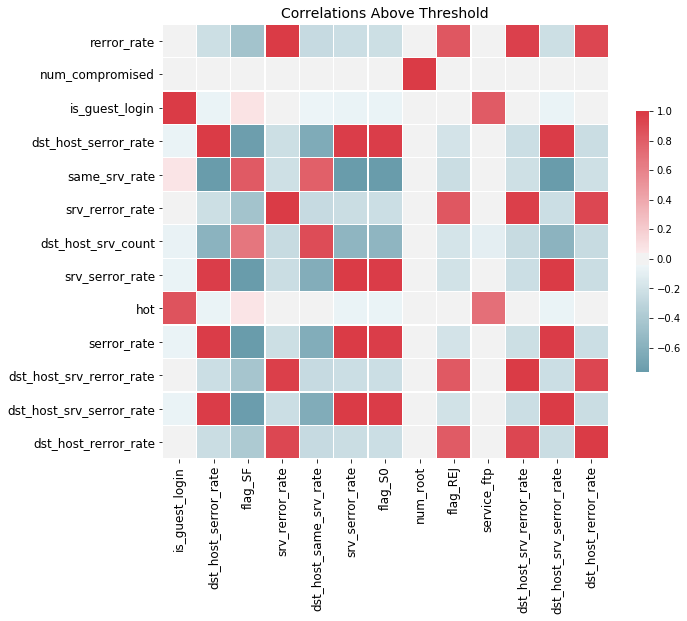

In [209]:
fs.plot_collinear()

In [210]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head(20)

,drop_feature,corr_feature,corr_value
0,num_root,num_compromised,0.998833
1,is_guest_login,hot,0.860288
2,srv_serror_rate,serror_rate,0.993289
3,srv_rerror_rate,rerror_rate,0.989008
4,dst_host_same_srv_rate,dst_host_srv_count,0.896663
5,dst_host_serror_rate,serror_rate,0.979373
6,dst_host_serror_rate,srv_serror_rate,0.977596
7,dst_host_srv_serror_rate,serror_rate,0.981139
8,dst_host_srv_serror_rate,srv_serror_rate,0.986252
9,dst_host_srv_serror_rate,dst_host_serror_rate,0.985052


In [211]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[130]	valid_0's auc: 0.999998	valid_0's binary_logloss: 0.00216111
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[287]	valid_0's auc: 0.999996	valid_0's binary_logloss: 0.0024582
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[350]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.0014901
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[397]	valid_0's auc: 1	valid_0's binary_logloss: 0.000814837
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[341]	valid_0's auc: 1	valid_0's binary_logloss: 0.000346129
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[416]	valid_0's auc: 1	valid_0's binary_logloss: 0.000852553
Tr

In [212]:
print(zero_importance_features)

['service_harvest', 'service_uucp', 'num_outbound_cmds', 'service_sql_net', 'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat', 'num_access_files', 'service_tftp_u', 'service_tim_i', 'service_aol', 'service_urh_i', 'service_urp_i', 'service_uucp_path', 'service_rje', 'service_vmnet', 'service_whois', 'service_bgp', 'num_shells', 'service_courier', 'su_attempted', 'service_domain', 'urgent', 'service_discard', 'service_daytime', 'land', 'service_efs', 'service_remote_job', 'service_hostnames', 'service_name', 'service_Z39_50', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_exec', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_netbios_dgm', 'service_red_i', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_ctf', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'is_host_logi

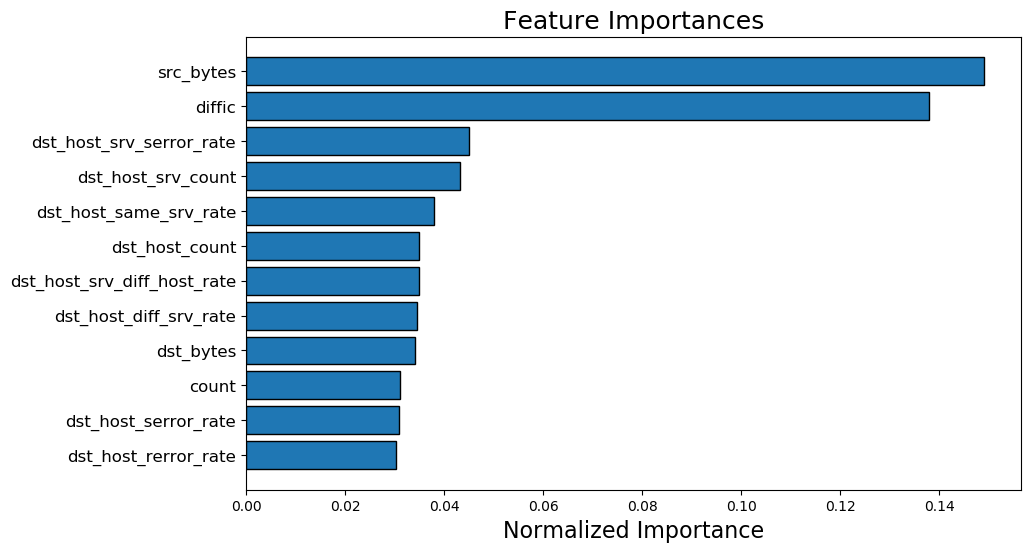

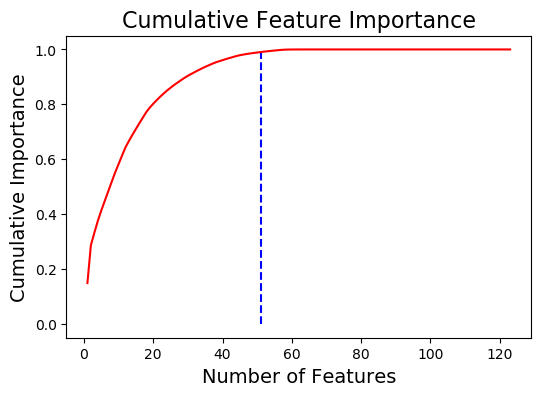

51 features required for 0.99 of cumulative importance


In [213]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [215]:
fs.identify_low_importance(cumulative_importance = 0.99)

50 features required for cumulative importance of 0.99 after one hot encoding.
73 features do not contribute to cumulative importance of 0.99.



In [216]:
fs.feature_importances.head(50)

,feature,importance,normalized_importance,cumulative_importance
0,src_bytes,1321.7,0.149041,0.149041
1,diffic,1223.5,0.137968,0.287009
2,dst_host_srv_serror_rate,399.5,0.045050,0.332059
3,dst_host_srv_count,383.4,0.043234,0.375293
4,dst_host_same_srv_rate,336.4,0.037934,0.413227
5,dst_host_count,309.4,0.034889,0.448117
6,dst_host_srv_diff_host_rate,309.0,0.034844,0.482961
7,dst_host_diff_srv_rate,306.4,0.034551,0.517512
8,dst_bytes,303.0,0.034168,0.551680
9,count,275.3,0.031044,0.582724


In [217]:
fs.identify_single_unique()

1 features with a single unique value.



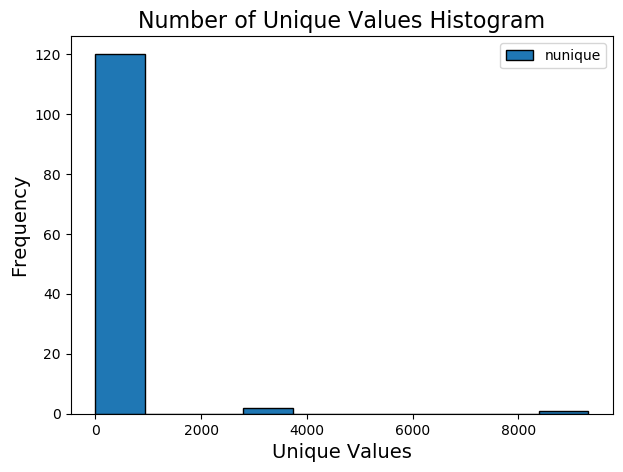

In [218]:
fs.plot_unique()

In [220]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.90, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.90})

0 features with greater than 0.60 missing values.

1 features with a single unique value.

8 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[161]	valid_0's auc: 0.999995	valid_0's binary_logloss: 0.00152825
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[172]	valid_0's auc: 0.999979	valid_0's binary_logloss: 0.00322174
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[460]	valid_0's auc: 1	valid_0's binary_logloss: 0.000367821
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[233]	valid_0's auc: 1	valid_0's binary_logloss: 0.00035332
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	valid_0's auc: 0.999994	valid_0's binary_logloss: 0.00150815
Training

In [223]:
fs.feature_importances.head(50)

,feature,importance,normalized_importance,cumulative_importance
0,src_bytes,1420.8,0.154822,0.154822
1,diffic,1268.5,0.138226,0.293048
2,dst_host_srv_count,391.2,0.042628,0.335676
3,dst_host_srv_serror_rate,382.2,0.041648,0.377324
4,dst_host_same_srv_rate,374.7,0.040830,0.418154
5,dst_host_count,326.6,0.035589,0.453743
6,dst_host_srv_diff_host_rate,315.9,0.034423,0.488166
7,dst_host_diff_srv_rate,305.4,0.033279,0.521445
8,dst_bytes,296.6,0.032320,0.553765
9,dst_host_rerror_rate,282.7,0.030805,0.584570


In [225]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [227]:
categories = ['talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

X, Y = newsgroups_train.data, newsgroups_train.target

In [233]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,diffic,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [234]:
# categories = ['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 
#               'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 
#               'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns',
#               'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 
#               'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 
#               'service_efs', 'service_exec', 'service_finger', 'service_ftp', 
#               'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames',
#               'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001',
#               'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 
#               'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 
#               'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn',
#               'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u',
#               'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3',
#               'service_printer', 'service_private', 'service_red_i', 'service_remote_job',
#               'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 
#               'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat',
#               'service_telnet', 'service_tftp_u', 'service_tim_i', 'service_time',
#               'service_urh_i', 'service_urp_i', 'service_uucp', 'service_uucp_path',
#               'service_vmnet', 'service_whois', 'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 
#               'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH']

categories = ['protocol_type', 'service', 'flag']
Gain_train = df_train(subset='train',categories=categories)


X, Y = Gain_train.data, y_train.target
cv = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000,
                                     stop_words='english')
X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(),
               mutual_info_classif(X_vec, Y, discrete_features=True)
               ))
print(res)

TypeError: 'DataFrame' object is not callable

In [240]:
from info_gain import info_gain
df_train.head()

# df_train.drop('flag', axis=1, inplace=True)
# df_train.drop('protocol_type', axis=1, inplace=True)
# df_train.drop('service', axis=1, inplace=True)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,diffic
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [269]:

var_dict={}

for i in df_train.columns:
    ig=info_gain.info_gain(df_train[i], df_train['class'])
    print('Information Gain of {} is : {}'.format(i,ig))
    var_dict.update({i: ig})


Information Gain of duration is : 0.06468873987822987
Information Gain of protocol_type is : 0.083173295825267
Information Gain of service is : 0.5961580677480169
Information Gain of flag is : 0.4891714417132885
Information Gain of src_bytes is : 0.7202435975044454
Information Gain of dst_bytes is : 0.4665466718041005
Information Gain of land is : 6.131248614200512e-05
Information Gain of wrong_fragment is : 0.00879660387340317
Information Gain of urgent is : 0.00011576362285248157
Information Gain of hot is : 0.023707597563017102
Information Gain of num_failed_logins is : 0.0018013774121636902
Information Gain of logged_in is : 0.3063437104229992
Information Gain of num_compromised is : 0.007406119583362715
Information Gain of root_shell is : 0.00181007238939292
Information Gain of su_attempted is : 0.00039943025245894187
Information Gain of num_root is : 0.0035494015162177636
Information Gain of num_file_creations is : 0.0022864892356732405
Information Gain of num_shells is : 0.00043

{'duration': 0.06468873987822987, 'protocol_type': 0.083173295825267, 'service': 0.5961580677480169, 'flag': 0.4891714417132885, 'src_bytes': 0.7202435975044454, 'dst_bytes': 0.4665466718041005, 'land': 6.131248614200512e-05, 'wrong_fragment': 0.00879660387340317, 'urgent': 0.00011576362285248157, 'hot': 0.023707597563017102, 'num_failed_logins': 0.0018013774121636902, 'logged_in': 0.3063437104229992, 'num_compromised': 0.007406119583362715, 'root_shell': 0.00181007238939292, 'su_attempted': 0.00039943025245894187, 'num_root': 0.0035494015162177636, 'num_file_creations': 0.0022864892356732405, 'num_shells': 0.00043021534875419074, 'num_access_files': 0.001822761708264082, 'num_outbound_cmds': 0.0, 'is_host_login': 4.971478738189327e-06, 'is_guest_login': 0.01133031057303991, 'count': 0.4179322433168098, 'srv_count': 0.16542196966898626, 'serror_rate': 0.38308470834223973, 'srv_serror_rate': 0.35771469513733045, 'rerror_rate': 0.07701524738821891, 'srv_rerror_rate': 0.054711631437587116

In [271]:

sorted(var_dict.items())

[('class', 0.9643499506777505),
 ('count', 0.4179322433168098),
 ('diff_srv_rate', 0.5075074637191463),
 ('diffic', 0.26117769135914015),
 ('dst_bytes', 0.4665466718041005),
 ('dst_host_count', 0.20887837303757406),
 ('dst_host_diff_srv_rate', 0.45176667662230874),
 ('dst_host_rerror_rate', 0.09790587262286599),
 ('dst_host_same_src_port_rate', 0.23577516634750872),
 ('dst_host_same_srv_rate', 0.40038160260810063),
 ('dst_host_serror_rate', 0.39861221193213614),
 ('dst_host_srv_count', 0.41642978185997537),
 ('dst_host_srv_diff_host_rate', 0.26138566084423087),
 ('dst_host_srv_rerror_rate', 0.08379909993515544),
 ('dst_host_srv_serror_rate', 0.3739118503984138),
 ('duration', 0.06468873987822987),
 ('flag', 0.4891714417132885),
 ('hot', 0.023707597563017102),
 ('is_guest_login', 0.01133031057303991),
 ('is_host_login', 4.971478738189327e-06),
 ('land', 6.131248614200512e-05),
 ('logged_in', 0.3063437104229992),
 ('num_access_files', 0.001822761708264082),
 ('num_compromised', 0.0074061

In [272]:


var_dict_R={}

for i in df_train.columns:
    igr=info_gain.info_gain_ratio(df_train[i], df_train['class'])
    print('Information Gain RATIO of {} is : {}'.format(i,igr))
    var_dict_R.update({i: igr})



Information Gain RATIO of duration is : 0.046496417228058924
Information Gain RATIO of protocol_type is : 0.05978258769925213
Information Gain RATIO of service is : 0.4285013791281741
Information Gain RATIO of flag is : 0.3516024503301014
Information Gain RATIO of src_bytes is : 0.5176905111839258
Information Gain RATIO of dst_bytes is : 0.3353404124025321
Information Gain RATIO of land is : 4.406966254582512e-05
Information Gain RATIO of wrong_fragment is : 0.0063227474311237895
Information Gain RATIO of urgent is : 8.320758323802315e-05
Information Gain RATIO of hot is : 0.017040343494709603
Information Gain RATIO of num_failed_logins is : 0.0012947785951439054
Information Gain RATIO of logged_in is : 0.22019110283848675
Information Gain RATIO of num_compromised is : 0.005323307067615639
Information Gain RATIO of root_shell is : 0.001301028296247989
Information Gain RATIO of su_attempted is : 0.000287099048563938
Information Gain RATIO of num_root is : 0.002551208357414707
Informatio

In [273]:
sorted(var_dict_R.items())


[('class', 0.6931471805599453),
 ('count', 0.3003977507506948),
 ('diff_srv_rate', 0.3647818588499164),
 ('diffic', 0.18772705931442363),
 ('dst_bytes', 0.3353404124025321),
 ('dst_host_count', 0.15013580417481054),
 ('dst_host_diff_srv_rate', 0.3247169743220423),
 ('dst_host_rerror_rate', 0.07037194280054256),
 ('dst_host_same_src_port_rate', 0.16946845041571312),
 ('dst_host_same_srv_rate', 0.28778285185873903),
 ('dst_host_serror_rate', 0.28651106441529917),
 ('dst_host_srv_count', 0.29931782440033533),
 ('dst_host_srv_diff_host_rate', 0.18787654183592095),
 ('dst_host_srv_rerror_rate', 0.06023239780609886),
 ('dst_host_srv_serror_rate', 0.26875715055459093),
 ('duration', 0.046496417228058924),
 ('flag', 0.3516024503301014),
 ('hot', 0.017040343494709603),
 ('is_guest_login', 0.008143903385956122),
 ('is_host_login', 3.5733568173750636e-06),
 ('land', 4.406966254582512e-05),
 ('logged_in', 0.22019110283848675),
 ('num_access_files', 0.0013101490159541395),
 ('num_compromised', 0.00

In [267]:
###Wrapper Method

z = [x for _,x in sorted(zip(gain_R_list,var_list_R))]
print(z)

['num_outbound_cmds', 'is_host_login', 'land', 'urgent', 'su_attempted', 'num_shells', 'num_failed_logins', 'root_shell', 'num_access_files', 'num_file_creations', 'num_root', 'num_compromised', 'wrong_fragment', 'is_guest_login', 'hot', 'srv_rerror_rate', 'duration', 'rerror_rate', 'protocol_type', 'dst_host_srv_rerror_rate', 'dst_host_rerror_rate', 'srv_diff_host_rate', 'srv_count', 'dst_host_count', 'dst_host_same_src_port_rate', 'diffic', 'dst_host_srv_diff_host_rate', 'logged_in', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_diff_srv_rate', 'same_srv_rate', 'dst_bytes', 'flag', 'diff_srv_rate', 'service', 'src_bytes', 'class']
